<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/7_7_Final_project_Mathematics_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговая работа.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции:

$tg^2(sin(x) + cos(2x+3))$

в точке $x_0=1$


In [ ]:
import math

x0 = 1

u = 2 * (math.sin(x0) + math.cos(2 * x0 + 3))
u_prime = 2 * math.cos(x0) - 4 * math.sin(2 * x0 + 3)
f_prime = (1 + math.tan(u) ** 2) * u_prime

print(f'Производная в точке x0=1: {f_prime}')


Производная в точке x0=1: 12.450668447560243


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

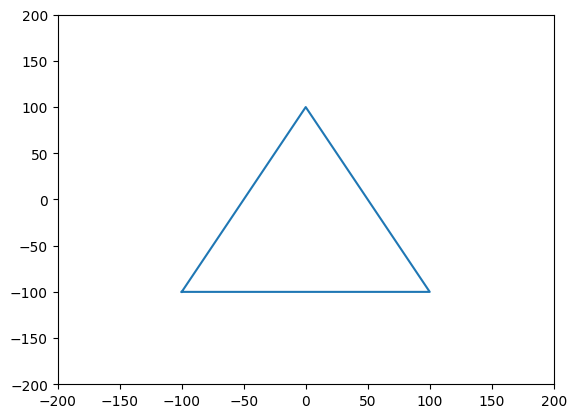

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


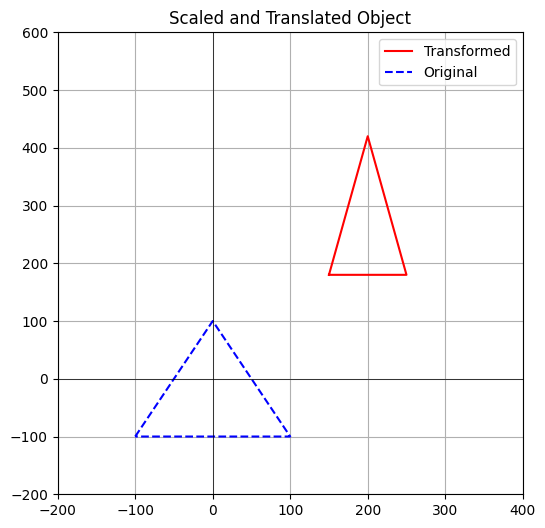

In [ ]:
# Матрица преобразования: масштабирование и смещение
M = np.array([
    [0.5, 0, 200],
    [0, 1.2, 300],
    [0, 0, 1]
])

# Применение преобразования
A_transformed = A @ M.T

# Извлечение x и y координат
x_transformed = A_transformed[:, 0]
y_transformed = A_transformed[:, 1]

# Построение графика
plt.figure(figsize=(6, 6))
plt.plot(x_transformed, y_transformed, 'r-', label='Transformed')
plt.plot(A[:, 0], A[:, 1], 'b--', label='Original')  # Оригинал для сравнения
plt.ylim([-200, 600])
plt.xlim([-200, 400])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Scaled and Translated Object')
plt.show()

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
# Нахождение собственных значений и векторов
eigenvalues, eigenvectors = np.linalg.eig(m)

print("Собственные значения:", eigenvalues)
print("Собственные векторы:\n", eigenvectors)

Собственные значения: [ 3. -1.]
Собственные векторы:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

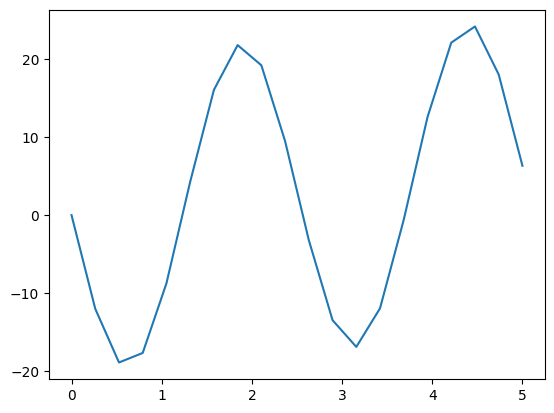

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Оптимальный параметр a: 1.9478017743949774
Оптимальный параметр b: 1.5691226680432202


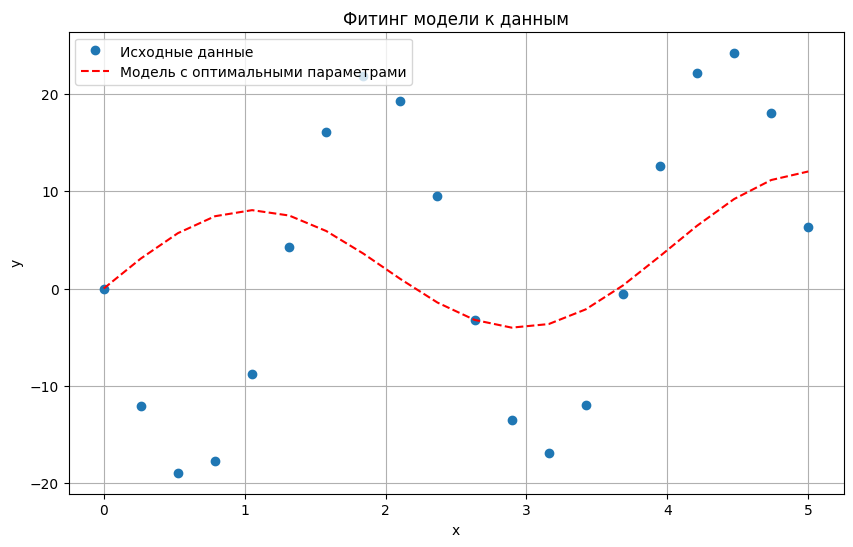

In [ ]:
# Оптимизация с использованием дифференциальной эволюции
bounds = [(-5, 5), (0, 10)]  # Границы для a и b
result = differential_evolution(error, bounds)
optimal_a, optimal_b = result.x

# Вывод результатов
print("Оптимальный параметр a:", optimal_a)
print("Оптимальный параметр b:", optimal_b)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, fx, 'o', label='Исходные данные')
plt.plot(x, f(x, optimal_a, optimal_b), 'r--', label='Модель с оптимальными параметрами')
plt.legend()
plt.title('Фитинг модели к данным')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Вычисление матрицы косинусной схожести
similarities = cosine_similarity(raitings)

# Исключаем диагональные элементы (сравнение с самим собой)
np.fill_diagonal(similarities, -np.inf)

# Поиск индексов наиболее похожих пользователей
most_similar_indices = np.argmax(similarities, axis=1)

# Вывод результатов
for i, j in enumerate(most_similar_indices):
    print(f"Пользователь {i} наиболее похож на пользователя {j}")

Пользователь 0 наиболее похож на пользователя 8
Пользователь 1 наиболее похож на пользователя 4
Пользователь 2 наиболее похож на пользователя 9
Пользователь 3 наиболее похож на пользователя 9
Пользователь 4 наиболее похож на пользователя 8
Пользователь 5 наиболее похож на пользователя 9
Пользователь 6 наиболее похож на пользователя 3
Пользователь 7 наиболее похож на пользователя 5
Пользователь 8 наиболее похож на пользователя 0
Пользователь 9 наиболее похож на пользователя 2
